#50 start up dataset

We have a dataset of 50 start-up companies. This dataset contains five main information: R&D Spend, Administration Spend, Marketing Spend, State, and Profit for a financial year. Our goal is to create a model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#data preprocessing

In [3]:
#handeling missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
#encoding categorical values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
LEncoder=LabelEncoder()
x.iloc[:,3]=LEncoder.fit_transform(x.iloc[:,3])
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [6]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# OhEncoder=OneHotEncoder()
# state_encoded=OhEncoder.fit_transform(x[["State"]]).toarray()
# state_encoded=pd.DataFrame(state_encoded)
# x=x.join(state_encoded)
# x

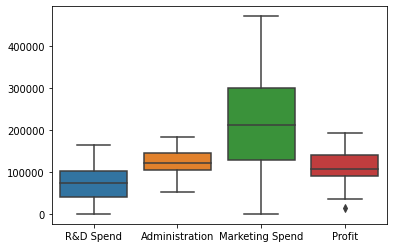

In [7]:
#to check whether the data is normal or not
import seaborn as sns
sns.boxplot(data=df)

**Conclusion :** we can observe that the data is not normal to perform regression

In [8]:
#perform scaling operation 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ms=MinMaxScaler()
ss=StandardScaler()

In [12]:
ms.fit(x)
ms_x=ms.transform(x)

y=np.array(y).reshape(-1,1)
ms.fit(y)
ms_y=ms.transform(y)

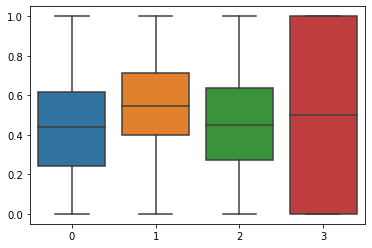

In [13]:
sns.boxplot(data=ms_x)

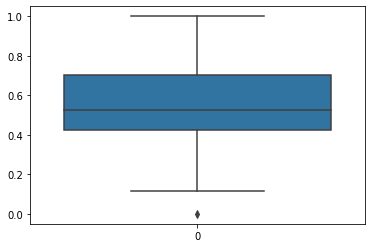

In [14]:
sns.boxplot(data=ms_y)

**Conclusion :** Now data looks normal and can be proceed to perform regression.

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(ms_x,ms_y,test_size=0.2)

#Fitting multiple regression to training data

In [17]:
Mul_reg=LinearRegression()
Mul_reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#calulate the accuracy of the model
print(Mul_reg.score(xtrain,ytrain))

0.9442460084181936


#prediction of train, test results

In [30]:
train_pred=Mul_reg.predict(xtrain)
test_pred=Mul_reg.predict(xtest)
print((train_pred-ytrain).mean())
print((test_pred-ytest).mean())

-6.765421556309548e-17
-0.012325849720636212
